In [1]:
import numpy as np
import matplotlib.pyplot as plt
from prospect.models import priors_beta as pb
from prospect.models import transforms as ts
import lbg_forecast.population_model as pop
import lbg_forecast.sfh as sfh
import lbg_forecast.cosmology as cosmo
import astropy.units as u
from astropy.cosmology import z_at_value


Text(0.5, 0, '$t_{L}/t_{\\mathrm{univ}}$')

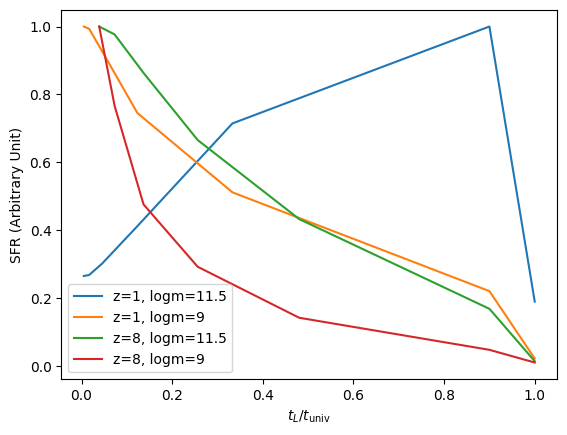

In [2]:
def get_sfr_curve(redshift, logmass):

    sigma = 0.000000000001
    agebins = sfh.default_agebins()

    logsfrratios = pop.prospector_beta_sfh_prior(100, redshift, logmass, sigma)[0, :]

    agebins_pbeta = ts.zred_to_agebins_pbeta(np.array([redshift]), agebins)
    sfrs = ts.logsfr_ratios_to_sfrs(logmass, logsfrratios, agebins_pbeta)
    lookback_time = (10**agebins_pbeta[:, 1])/1e9
    tuniv = cosmo.get_wmap9().age(redshift)

    return lookback_time/tuniv, sfrs


redshift = 1
logmass = 11.5
x1, y1 = get_sfr_curve(redshift, logmass)

redshift = 8
logmass = 11.5
x2, y2 = get_sfr_curve(redshift, logmass)

redshift = 1
logmass = 9
x3, y3 = get_sfr_curve(redshift, logmass)

redshift = 8
logmass = 9
x4, y4 = get_sfr_curve(redshift, logmass)

plt.plot(x1.value, y1/np.max(y1), label="z=1, logm=11.5")
plt.plot(x3.value, y3/np.max(y3), label="z=1, logm=9")
plt.plot(x2.value, y2/np.max(y2), label="z=8, logm=11.5")
plt.plot(x4.value, y4/np.max(y4), label="z=8, logm=9")
plt.legend()

plt.ylabel("SFR (Arbitrary Unit)")
plt.xlabel("$t_{L}/t_{\mathrm{univ}}$")

Text(0, 0.5, 'SFR/M (yr$^{-1}$)')

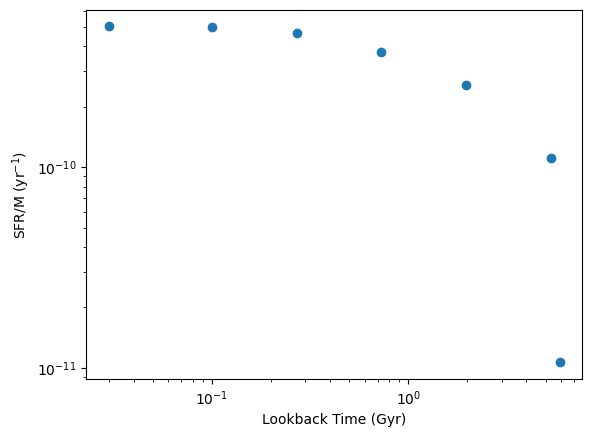

In [4]:
sigma = 0.0001
nbins = 7
redshift = 1
logmass = 9

agebins = sfh.default_agebins()
agebins_pbeta = ts.zred_to_agebins_pbeta(np.array([redshift]), agebins)

logsfrratios = pop.prospector_beta_sfh_prior(100, redshift, logmass, sigma)[0, :]

sfrs = ts.logsfr_ratios_to_sfrs(logmass, logsfrratios, agebins_pbeta)
lookback_time = (10**agebins_pbeta[:, 1])/1e9
tuniv = cosmo.get_wmap9().age(redshift)



#plotting
plt.scatter(lookback_time, sfrs/(10**logmass))
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Lookback Time (Gyr)")
plt.ylabel("SFR/M (yr$^{-1}$)")

In [ ]:
sfrs

array([0.53350645, 0.52987432, 0.52227023, 0.51165498, 0.49867248,
       0.48354922, 0.46668263, 0.44840623, 0.42866499, 0.40732064,
       0.38474914, 0.36159868, 0.33879947, 0.31559609, 0.29091959,
       0.26487303, 0.23710609, 0.20902112, 0.17860939, 0.14647887,
       0.11412333, 0.08157494, 0.05003078, 0.01126549])

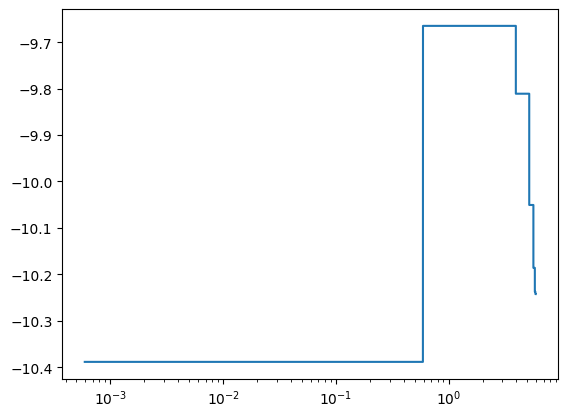

In [ ]:
sigma = 0.0000000001
nbins = 7
redshift = 1
logmass = 11.5

#setup logarthimically spaced age bins
agelims = np.logspace(-3, np.log10(13.7), nbins+1)
agebins = np.array([agelims[0:-1], agelims[1:]]).T

#sample prospector beta prior at z=1, logmass=9
#samples = pb.DymSFHfixZred(zred=redshift,
#        mass_mini=logmass-1e-3, mass_maxi=logmass+1e-3,
#        z_mini=-1.98, z_maxi=0.19,
#        logsfr_ratio_mini=-5.0, logsfr_ratio_maxi=5.0,
#        logsfr_ratio_tscale=sigma, nbins_sfh=nbins,
#        const_phi=True).sample()

logsfrratios = pb.expe_logsfr_ratios(this_z=redshift, this_m=logmass, nbins_sfh=nbins,
                                           logsfr_ratio_mini=-5,
                                           logsfr_ratio_maxi=5)

agebins_pbeta = ts.zred_to_agebins_pbeta(np.array([redshift]), agebins)
#logsfrratios = ts.nzsfh_to_logsfr_ratios(samples)
sfrs = ts.logsfr_ratios_to_sfrs(logmass, logsfrratios, agebins_pbeta)
masses = ts.logsfr_ratios_to_masses(logmass, logsfrratios, agebins_pbeta)

times, sfrout, maxage = sfh.convert_sfh(agebins_pbeta, masses)



#plotting
plt.plot(times, np.log10(sfrout/(10**logmass)))
plt.xscale("log")


In [ ]:
masses = ts.logsfr_ratios_to_masses(logmass, logsfrratios, agebins_pbeta)
masses_formed = np.cumsum(masses)